# Building a Deep Neural Network to solve MNIST classification problem

MNIST dataset (https://www.tensorflow.org/datasets/catalog/mnist) consists of 70,000 black-white images of the size 28x28x1 and in 10 classes which are hand-written digits. There are 60,000 training images and 10,000 test images.

Here follows some data samples in the dataset:

![alt text](https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png)

In [83]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

In [84]:
# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (60000, 28, 28), y_train = (60000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


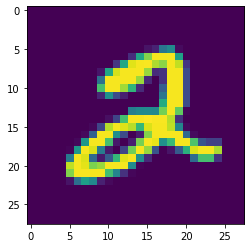

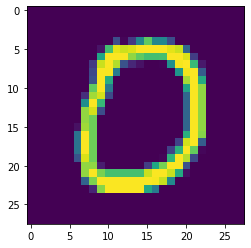

In [85]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

In [86]:
# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Val shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (54000, 28, 28), y_train = (54000,)
Val shape: X_val = (6000, 28, 28), y_val = (6000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


Label: 1
Pixel values: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 173 253 234  30   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 253 252 253  50   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 102 254 253 254  50   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0

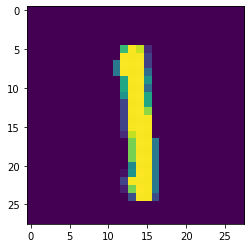

In [87]:
# Show label and pixel values of an image
print("Label:", y_train[0])
print("Pixel values:", X_train[0])

# Show the image
imgplot = plt.imshow(X_train[0])
plt.show()

In [88]:
# Normalize pixel values
X_train_norm, X_val_norm, X_test_norm = X_train/255.0, X_val/255.0, X_test/255.0

# Solution by using Logistic Regression

In [89]:
### Convert 3D data tensors (batch, width, height) to 2D data tensors (batch, width * height) for training, validation and testing purpose.
# Note: The scikit-learn LogisticRegression requires 2D tensors as input, whereas Tensorflow DNN requires 3D tensors as input.

# Get batch size
num_train_samples = X_train_norm.shape[0]
num_val_samples = X_val_norm.shape[0]
num_test_samples = X_test_norm.shape[0]

# Get width and height
img_width = X_train_norm.shape[1]
img_height = X_train_norm.shape[2]

# Convert from 3D tensors to 2D tensors
X_train_norm_2D = X_train_norm.reshape(num_train_samples, img_width * img_height)
X_val_norm_2D = X_val_norm.reshape(num_val_samples, img_width * img_height)
X_test_norm_2D = X_test_norm.reshape(num_test_samples, img_width * img_height)

In [90]:
# Initialize the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=100)           # Initialize Logistic Regression model
logistic_model.fit(X_train_norm_2D, y_train)                # Train the model

# Note: there is a ConvergenceWarning because the training set is too big for Logistic Regression.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [91]:
# Show prediction results
logistic_model.predict(X_test_norm_2D)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [92]:
# Evaluation the model accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, logistic_model.predict(X_test_norm_2D)))

Accuracy: 0.9255


# Solution by using a Deep Neural Network

In [93]:
# Import libraries
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

# Initialize dnn_model as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
dnn_model = Sequential() # Initialize a sequential model.
dnn_model.add(Conv2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(MaxPooling2D((2, 2))) # Add Max Pooling layer
dnn_model.add(Flatten()) # Flatten the vector to 1D
dnn_model.add(Dense(100, activation='relu')) # Add FC layer and Relu activation
dnn_model.add(Dense(10, activation='softmax')) # Add FC layer and Softmax activation for classification

#Model Summary
dnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_14 (Dense)            (None, 100)               627300    
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
________________________________________________

# Train and validate the model

In [94]:
# Compile the model
dnn_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history = dnn_model.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/10
53/53 [==============================] - 1s 19ms/step - loss: 0.3860 - accuracy: 0.8801 - val_loss: 0.0998 - val_accuracy: 0.9693
Epoch 2/10
53/53 [==============================] - 1s 16ms/step - loss: 0.0728 - accuracy: 0.9781 - val_loss: 0.0691 - val_accuracy: 0.9800
Epoch 3/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0525 - val_accuracy: 0.9853
Epoch 4/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.0491 - val_accuracy: 0.9863
Epoch 5/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0453 - val_accuracy: 0.9883
Epoch 6/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0489 - val_accuracy: 0.9870
Epoch 7/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0483 - val_accuracy: 0.9887
Epoch 8/10
53

There are three popular losses for a classification problem: binary_crossentropy, categorical_crossentropy and sparse_categorical_crossentropy.
* The `binary_crossentropy` is used in binary classification tasks. The loss function is:
<center>
$J = -ylog(\hat{y})-(1-y)log(1-\hat{y})$
</center>

* The `categorical_crossentropy` requires one-hot encoding label. The loss function is:
<center>
$J=-\displaystyle\sum_{i=1}^{N}y_ilog(\hat{y}_i)$
</center>

* The `sparse_categorical_crossentropy` requires integer label. This is called sparse since the label representation requires much less space than one-hot encoding. The sparse_categorical_crossentropy works on integers and these integers must be the class indices, not actual values. This loss computes logarithm only for output index which ground truth indicates to. For instance, when model output is [0.1, 0.3, 0.7] and ground truth is 3 (if indexed from 1) then loss compute only logarithm of 0.7. Therefore, the loss function now is:
<center>
$J=-log(\hat{y}_i)$
</center>

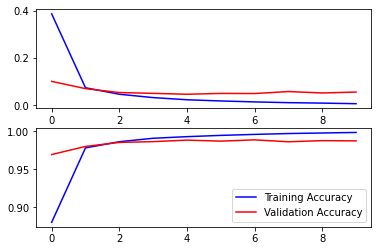

In [95]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [96]:
# Show the model performance
result = dnn_model.evaluate(X_test_norm, y_test) # If unspecified, batch_size will default to 32
print(dnn_model.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in dnn_model.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9844
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.05994874984025955, accuracy = 0.9843999743461609
